In [1]:
import pandas as pd
from nltk.tokenize import sent_tokenize
from underthesea import text_normalize
from underthesea import word_tokenize
from underthesea import classify
from underthesea import sentiment
import matplotlib.pyplot as plt
import seaborn as sns
from string import punctuation
from nltk.tokenize import word_tokenize
from nltk.stem import LancasterStemmer
from string import punctuation
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import LancasterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
import re
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("F:\Project NLP\Crawldata_BVDHYD.csv",).drop(["Time", "Rating"], axis=1)
print(data.head())

                                         Review Text sentiment
0  If you're a foreigner, don't even bother comin...   Neutral
1  Supposedly one of the best public hospitals in...  Positive
2  After having gone to multiple clinics and “for...  Positive
3  I’ve never seen any hospitals in Vietnam like ...  Negative
4  The worst service ever.  I was hospitalized he...  Negative


In [3]:
data["sentiment"] = data["sentiment"].replace({"Negative": 0, "Neutral": 1, "Positive": 2})
data

,Review Text,sentiment
0,"If you're a foreigner, don't even bother comin...",1
1,Supposedly one of the best public hospitals in...,2
2,After having gone to multiple clinics and “for...,2
3,I’ve never seen any hospitals in Vietnam like ...,0
4,The worst service ever. I was hospitalized he...,0
...,...,...
1135,"Ổn, khá đông, bác sĩ tốt",2
1136,Miễn bàn luận luôn,2
1137,Bệnh viện tốt,2
1138,Tot.co Wi-Fi ∩__∩,2


In [4]:
data.shape

(1140, 2)

In [5]:
texts = data['Review Text']

In [6]:
import numpy as np

text_lens = []
for t in texts.values:
    if isinstance(t, str):
        text_len = len(t.split())
        text_lens.append(text_len)

len_mean = np.mean(text_lens)

In [7]:
len_mean

48.0325417766051

In [8]:
stopwords_vn = [
"bị",
"bởi",
"cả",
"các",
"cái",
"cần",
"càng"
"chỉ",
"chiếc",
"cho",
"chứ",
"chưa",
"chuyện",
"có",
"có_thể",
"cứ",
"của",
"cùng",
"cũng"
"đã",
"đang",
"đây",
"để",
"đến_nỗi",
"đều",
"điều",
"do",
"đó",
"được",
"dưới",
"gì",
"khi",
"không",
"là",
"lại",
"lên",
"lúc",
"mà",
"mỗi",
"một_cách",
"này",
"nên",
"nếu",
"ngay",
"nhiều",
"như",
"nhưng",
"những",
"nơi",
"nữa",
"phải",
"qua",
"ra",
"rằng",
"rằng",
"rất",
"rất",
"rồi",
"sau",
"sẽ",
"so",
"sự",
"tại",
"theo",
"thì",
"trên",
"trước",
"từ",
"từng",
"và",
"vẫn",
"vào",
"vậy",
"vì",
"việc",
"với",
"vừa",
    # Add more stopwords as needed
]

In [9]:
stuff_to_be_removed = stopwords.words('english') + list(punctuation) + stopwords_vn
stemmer = LancasterStemmer()
corpus = data['Review Text'].tolist()
print(len(corpus))
print(corpus[0])


1140
If you're a foreigner, don't even bother coming here. Their process diagnostic papers on hand to see the doctors and if you don't have them, you'll be on an expensive goose chase around the whole facility waiting on it all.

We arrived at approximately 2 AM and left at around 4 PM to give you an example of the wait. Once you go to the nicer areas, it's air conditioned, so there's that. Also there are water fountains that dispense cold, water, and hot water which is cool.

There's barely any semblance of a triage system or lines as Viets are terrible at waiting in line and when they see someone get in line before them, even if it's needed. So there's just a number system instead. You go to the target room and wait for your number to show up in that room.

But that docs here are pretty good with a lot of the practices you might see Western docs do, at least the good ones do it.


In [10]:
word_replacements = leet = {
    "1": "i",
    "3": "e",
    "4": "a",
    "5": "s",
    "7": "t",
    "0": "o",
    "@" :"a",
    "/\ ": "a",
    "/-\ ": "a",
    "*" : "a",
    "ä" : "a",
    "á" :"a",
    "à" : "a",
    "â" : "a",
    "a^": "a",
    "ã" : "a",
    "å" : "a",
    "ą" : "a",
    "ª" : "a",
    "∀" : "a",
    "∧" : "a",
    "α" : "a",
    "8" : "b",
    "|3": "b",
    "13": "b",
    "ß" : "b",
    "þ" : "b",
    "v" : "b",
    "ć" : "c",
    "č" : "c",
    "ç" : "c",
    "©" : "c",
    "σ" : "c",
    "(" : "c",
    "¢" : "c",
    "<" : "c",
    '[' : "c",
    '©': "c",
    "[)" : "d",
    "|>" : "d",
    "|)" : "d",
    "|]": "d",
    "3" : "e",
    "€" : "e",
    "є" : "e",
    "[-": "e",
    "|=" : "f",
    "ƒ" : "f",
    "/=": "f",
    "6" : "g",
    "(_+": "g",
    "#" : "h",
    "/-/" : "h",
    "[-]" : "h",
    "]-[" : "h",
    ")-(" : "h",
    "(-)" : "h",
    ":-:" : "h",
    "|~|" : "h",
    "|-|" : "h",
    "]~[" : "h",
    "}{" : "h",
    "1" : "i",
    '!' : "i",
    "|" : "i",
    "][" : "i",
    "]" : "i",
    ":": "i",
    "_|" : "j",
    "_/" : "j",
    "¿" : "j",
    "(/" : "j",
    "ʝ" : "j",
    ";" : "j",
    "X" : "k",
    "|<" : "k",
    "|{" : "k",
    "ɮ" : "k",
    "£" : "l",
    "1_" : "l",
    "ℓ" : "l",
    "|_" : "l",
    "[_": "l",
    "|V|" : "m",
    "|\/|" : "m",
    "/\/\ " : "m",
    "/V\ ": "m",
    "|V" : "n",
    "|\|" : "n",
    "/\/" : "n",
    "[\]" : "n",
    "/V" : "n",
    "[]" : "o",
    "0" :"o" ,
    "()" : "o",
    "°" : "o",
    "|*" : "p",
    "|o" : "p",
    "|º" : "p",
    "|°" : "p",
    "/*" : "p",
    "¶" : "q",
    "(_,)" : "q",
    "()_" : "q",
    "0_" : "q",
    "°|" : "q",
    "<|" : "q",
    "®" : "r",
    "2" : "r",
    "|?" : "r",
    "/2" : "r",
    "®" : "r",
    "Я" : "r",
    "|2": "r",
    "§" : "s",
    "5" : "s",
    "$" : "s",
    "_/¯": "s",
    "7" : "t",
    "†" : "t",
    "¯|¯" : "t",
    "(_)" : "u",
    "|_|" : "u",
    "L|" : "u",
    "µ": "u",
    "\/" : "v",
    "|/" : "v",
    "\/\/" : "w",
    "vv" : "w",
    "\//" :"w",
    "\^/" : "w",
    "\V/" : "w",
    "\|/" : "w",
    "\_|_/" : "w",
    "\_:_/" : "w",
    "><": "x",
    "}{" : "x",
    "×" : "x",
    ")(" : "x",
    " `/" : "y",
    "φ" : "y",
    "¥" : "y",
    "\/": "y",
    "≥" : "z",
    "7_" : "z",
    ">_": "z",
    "youre": "you are",
    "im": "I am",
    "dont": "do not",
    "cant": "cannot",
    "wont": "will not",
    "ive": "I have",
    "id": "I would",
    "theyre": "they are",
    "theres": "there is",
    "ko": "không",
    "t": "tôi",
    "m": "mình",
    "mày": "em",
    "tao": "anh",
    "dc": "được",
    "hok": "không",
    "ngta": "người ta",
    'bsau': "bữa sau",
    "k":'không'
}

In [11]:
final_corpus = []
final_corpus_joined = []
for i in data.index:
    text = data['Review Text'][i]
    if isinstance(text, str):
        text = re.sub('[^a-zA-Zàáảãạăắằẵặẳâấầẩẫậđèéẻẽẹêềếểễệìíỉĩịòóỏõọôốồổỗộơớờởỡợùúủũụưứừửữựỳýỷỹỵ]', ' ', text)
        text = text.lower()
        text = re.sub("&lt;/?.*?&gt;", " &lt;&gt; ", text)
        text = re.sub("(\\d|\\W)+", " ", text)
        text = re.sub(r'\d+', '', text)
        text = re.sub(r'(http\S+)?(\w+\.)+\S+', r'', text)
        text = text.split()
        lem = WordNetLemmatizer()
        text = [lem.lemmatize(word) for word in text if not word in stuff_to_be_removed]
        # Apply word replacements
        text = [word_replacements.get(word, word) for word in text]
        text1 = " ".join(text)
    else:
        # Handle non-string elements
        text1 = ""
    final_corpus.append(text)
    final_corpus_joined.append(text1)

In [12]:
num_elements = len(final_corpus)
print(num_elements)

1140


In [13]:
num_elements_2 = len(final_corpus_joined)
print(num_elements_2)

1140


In [14]:
data_cleaned = pd.DataFrame()
data_cleaned["Review Text"] = final_corpus_joined
data_cleaned["sentiment"] = data["sentiment"].values

In [15]:
data_eda = pd.DataFrame()
data_eda['Review Text'] = final_corpus
data_eda['sentiment'] = data['sentiment'].values
data_eda.head()

,Review Text,sentiment
0,"[foreigner, even, bother, coming, process, dia...",1
1,"[supposedly, one, best, public, hospital, viet...",2
2,"[gone, multiple, clinic, foreigner, hospital, ...",2
3,"[never, seen, hospital, vietnam, like, one, lo...",0
4,"[worst, service, ever, hospitalized, given, qr...",0


In [16]:
Neutral = data_eda[data_eda['sentiment'] == 4]
Neutral_list = Neutral['Review Text'].tolist()
Negative = data_eda[data_eda['sentiment'] == 0]
Negative_list = Negative['Review Text'].tolist()
Positive = data_eda[data_eda['sentiment'] == 2]
Positive_list = Positive['Review Text'].tolist()

In [17]:
Positive_all = " ".join([word for sent in Positive_list if isinstance(sent, list) for word in sent])
Negative_all = " ".join([word for sent in Negative_list if isinstance(sent, list) for word in sent])
Neutral_all = " ".join([word for sent in Neutral_list if isinstance(sent, list) for word in sent])

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
xt = tfidf.fit_transform(data_cleaned['Review Text'])
y = data_cleaned['sentiment']

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(xt, 
                                                    y, 
                                                    test_size=0.33, 
                                                    random_state=123,
                                                    stratify = y)

In [29]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression

In [30]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [31]:
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)
accuracy_score(y_train,y_train_pred)*100

88.33551769331585

In [32]:
from sklearn.metrics import confusion_matrix

y_train_pred = lr.predict(X_train)
confusion_matrix_train = confusion_matrix(y_train, y_train_pred)

print(confusion_matrix_train)

[[215   0  17]
 [ 18   3  46]
 [  8   0 456]]


              precision    recall  f1-score   support

           0       0.89      0.93      0.91       232
           1       1.00      0.04      0.09        67
           2       0.88      0.98      0.93       464

    accuracy                           0.88       763
   macro avg       0.92      0.65      0.64       763
weighted avg       0.89      0.88      0.85       763



<Axes: >

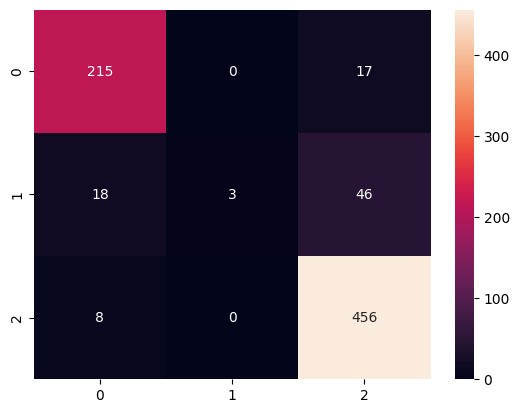

In [33]:
from sklearn.metrics import classification_report

y_train_pred = lr.predict(X_train)
classification_report_train = classification_report(y_train, y_train_pred)

print(classification_report_train)
sns.heatmap(confusion_matrix_train, annot=True, fmt='d')

In [34]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier().fit(X_train, y_train)
sgd_prediction = sgd.predict(X_test)
print(classification_report(y_test, sgd_prediction))


              precision    recall  f1-score   support

           0       0.73      0.61      0.66       115
           1       0.28      0.15      0.20        33
           2       0.78      0.90      0.83       229

    accuracy                           0.74       377
   macro avg       0.60      0.55      0.56       377
weighted avg       0.72      0.74      0.73       377



In [26]:
from sklearn.svm import SVC
svc = SVC(C=1000).fit(X_train, y_train)
svc_prediction = svc.predict(X_test)
print(classification_report(y_test, svc_prediction))

              precision    recall  f1-score   support

           0       0.78      0.67      0.72       139
           1       0.17      0.03      0.04        40
           2       0.79      0.95      0.86       277

    accuracy                           0.78       456
   macro avg       0.58      0.55      0.54       456
weighted avg       0.73      0.78      0.75       456



In [ ]:
from underthesea import sent_tokenize

sentences = []
for review in data["Review Text"]:
    review = str(review)  # Convert to string
    preprocessed_sentences = sent_tokenize(review)
    sentences.extend(preprocessed_sentences)

print(sentences)

In [ ]:
from underthesea import text_normalize

normalized_sentences = []
for sentence in sentences:
    normalized_sentence = text_normalize(sentence)
    normalized_sentences.append(normalized_sentence)

print(normalized_sentences)

In [ ]:
from underthesea import word_tokenize

tokenized_sentences = []
for normalized_sentence in normalized_sentences:
    tokenized_sentence = word_tokenize(normalized_sentence)
    tokenized_sentences.append(tokenized_sentence)

print(tokenized_sentences)

In [ ]:
lowercased_sentences = []
for sentence in tokenized_sentences:
    lowercased_sentence = [word.lower() for word in sentence]
    lowercased_sentences.append(lowercased_sentence)

print(lowercased_sentences)

In [ ]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Define the list of stopwords for Vietnamese and English

stopwords_en = set(stopwords.words('english'))

# Tokenize and remove stopwords
filtered_sentences = []
for sentence in lowercased_sentences:
    filtered_sentence_vn = [word for word in sentence if word.lower() not in stopwords_vn]
    filtered_sentence_en = [word for word in sentence if word.lower() not in stopwords_en]
    filtered_sentences.append(filtered_sentence_vn)
    filtered_sentences.append(filtered_sentence_en)

print(filtered_sentences)

In [ ]:
import re

cleaned_sentences = []
for sentence in filtered_sentences:
    cleaned_sentence = []
    for word in sentence:
        # Remove numbers
        word = re.sub(r'\d+', '', word)
        # Remove punctuation
        word = re.sub(r'[^\w\s]', '', word)
        # Remove duplicate characters within a word
        #word = re.sub(r'(\w)\1+', r'\1', word)
        #word = re.sub(r'(.)\1{2,}', r'\1', word)
        # Remove HTTP characters within a word
        word = re.sub(r'(http\S+)?(\w+\.)+\S+', r'', word)

        word = re.sub(r'[^\s\wáàảãạăắằẳẵặâấầẩẫậéèẻẽẹêếềểễệóòỏõọôốồổỗộơớờởỡợíìỉĩịúùủũụưứừửữựýỳỷỹỵđ]', r' ', word)
        # Add cleaned word to the sentence
        if word:
            cleaned_sentence.append(word)
    cleaned_sentences.append(cleaned_sentence)

print(cleaned_sentences)

In [ ]:
word_replacements = leet = {
    "1": "i",
    "3": "e",
    "4": "a",
    "5": "s",
    "7": "t",
    "0": "o",
    "@" :"a",
    "/\ ": "a",
    "/-\ ": "a",
    "*" : "a",
    "ä" : "a",
    "á" :"a",
    "à" : "a",
    "â" : "a",
    "a^": "a",
    "ã" : "a",
    "å" : "a",
    "ą" : "a",
    "ª" : "a",
    "∀" : "a",
    "∧" : "a",
    "α" : "a",
    "8" : "b",
    "|3": "b",
    "13": "b",
    "ß" : "b",
    "þ" : "b",
    "v" : "b",
    "ć" : "c",
    "č" : "c",
    "ç" : "c",
    "©" : "c",
    "σ" : "c",
    "(" : "c",
    "¢" : "c",
    "<" : "c",
    '[' : "c",
    '©': "c",
    "[)" : "d",
    "|>" : "d",
    "|)" : "d",
    "|]": "d",
    "3" : "e",
    "€" : "e",
    "є" : "e",
    "[-": "e",
    "|=" : "f",
    "ƒ" : "f",
    "/=": "f",
    "6" : "g",
    "(_+": "g",
    "#" : "h",
    "/-/" : "h",
    "[-]" : "h",
    "]-[" : "h",
    ")-(" : "h",
    "(-)" : "h",
    ":-:" : "h",
    "|~|" : "h",
    "|-|" : "h",
    "]~[" : "h",
    "}{" : "h",
    "1" : "i",
    '!' : "i",
    "|" : "i",
    "][" : "i",
    "]" : "i",
    ":": "i",
    "_|" : "j",
    "_/" : "j",
    "¿" : "j",
    "(/" : "j",
    "ʝ" : "j",
    ";" : "j",
    "X" : "k",
    "|<" : "k",
    "|{" : "k",
    "ɮ" : "k",
    "£" : "l",
    "1_" : "l",
    "ℓ" : "l",
    "|_" : "l",
    "[_": "l",
    "|V|" : "m",
    "|\/|" : "m",
    "/\/\ " : "m",
    "/V\ ": "m",
    "|V" : "n",
    "|\|" : "n",
    "/\/" : "n",
    "[\]" : "n",
    "/V" : "n",
    "[]" : "o",
    "0" :"o" ,
    "()" : "o",
    "°" : "o",
    "|*" : "p",
    "|o" : "p",
    "|º" : "p",
    "|°" : "p",
    "/*" : "p",
    "¶" : "q",
    "(_,)" : "q",
    "()_" : "q",
    "0_" : "q",
    "°|" : "q",
    "<|" : "q",
    "®" : "r",
    "2" : "r",
    "|?" : "r",
    "/2" : "r",
    "®" : "r",
    "Я" : "r",
    "|2": "r",
    "§" : "s",
    "5" : "s",
    "$" : "s",
    "_/¯": "s",
    "7" : "t",
    "†" : "t",
    "¯|¯" : "t",
    "(_)" : "u",
    "|_|" : "u",
    "L|" : "u",
    "µ": "u",
    "\/" : "v",
    "|/" : "v",
    "\/\/" : "w",
    "vv" : "w",
    "\//" :"w",
    "\^/" : "w",
    "\V/" : "w",
    "\|/" : "w",
    "\_|_/" : "w",
    "\_:_/" : "w",
    "><": "x",
    "}{" : "x",
    "×" : "x",
    ")(" : "x",
    " `/" : "y",
    "φ" : "y",
    "¥" : "y",
    "\/": "y",
    "≥" : "z",
    "7_" : "z",
    ">_": "z",
    "youre": "you are",
    "im": "I am",
    "dont": "do not",
    "cant": "cannot",
    "wont": "will not",
    "ive": "I have",
    "id": "I would",
    "theyre": "they are",
    "theres": "there is",
    "ko": "không",
    "t": "tôi",
    "m": "mình",
    "mày": "em",
    "tao": "anh",
    "dc": "được",
    "hok": "không",
    "ngta": "người ta",
    'bsau': "bữa sau",
    "k":'không'
}

replaced_sentences = []
for sentence in cleaned_sentences:
    replaced_sentence = [word_replacements.get(word, word) for word in sentence]
    replaced_sentences.append(replaced_sentence)

print(replaced_sentences)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
xt = tfidf.fit_transform(data['Review Text'])
y = data['sentiment']

In [ ]:
replaced_sentences

In [ ]:
# Convert text to numerical features using TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(joined_sentences)

# Apply StandardScaler to the numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.toarray())

# Use the scaled features for further training or analysis
print(X_scaled)

In [ ]:
# Check the shapes of the input arrays
print(X_scaled.shape)
print(data["sentiment"].shape)

In [ ]:
# Make sure that all input arrays have the same number of samples
assert X_scaled.shape[0] == data["sentiment"].shape[0]

In [ ]:
from sklearn.model_selection import train_test_split



X_train, X_test, y_train, y_test = train_test_split(X_scaled, data["sentiment"], test_size=0.2, random_state=42)